# Вхідні дані

- **Команда підтримки:**
  Кожен продукт має свою команду підтримки.

- **Час виконання завдання:**
  Стажний агент служби підтримки може виконати кожне завдання до **5 хвилин** з моменту взяття його в роботу.

- **Менеджмент очікувань:**
  - Середній час від появи нового запиту користувача до відповіді має становити **15 хвилин** протягом кожного дня.
  - Не бажано, щоб користувачі сервісу чекали на відповідь довше **45 хвилин**.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('events.csv', parse_dates=['request_time', 'start_time', 'finish_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35617 entries, 0 to 35616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   moderator     35617 non-null  int64         
 1   id_request    35617 non-null  int64         
 2   request_time  35617 non-null  datetime64[ns]
 3   start_time    35617 non-null  datetime64[ns]
 4   finish_time   35617 non-null  datetime64[ns]
 5   team          35617 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,moderator,id_request,request_time,start_time,finish_time
count,35617.000000,35617.000000,35617,35617,35617
mean,150.555746,194862.075189,2020-11-28 20:27:33.806384384,2020-11-30 13:36:17.459555840,2020-11-30 13:38:32.040963840
min,102.000000,159660.000000,2020-09-24 07:01:16,2020-10-01 07:07:31,2020-10-01 07:08:22
25%,122.000000,183360.000000,2020-11-21 19:15:17,2020-11-22 11:54:24,2020-11-22 11:55:49
50%,153.000000,196043.000000,2020-12-03 12:34:30,2020-12-05 20:09:25,2020-12-05 20:09:46
75%,180.000000,208019.000000,2020-12-16 15:27:34,2020-12-18 07:53:37,2020-12-18 07:56:42
max,188.000000,222222.000000,2020-12-31 22:11:17,2020-12-31 22:50:05,2020-12-31 22:52:16
std,29.613379,15763.507055,NaN,NaN,NaN


# 1. Наскільки служба підтримки відповідає очікуванням менеджменту? Як вона працює зараз?

Для відповіді на це питання нам потрібно оцінити час відповіді та обробки кейсів агентами підтримки. Чи очікує користувач на відповідь більше 45 хвилин? І чи займає обробка запиту більше 5 хвилин?


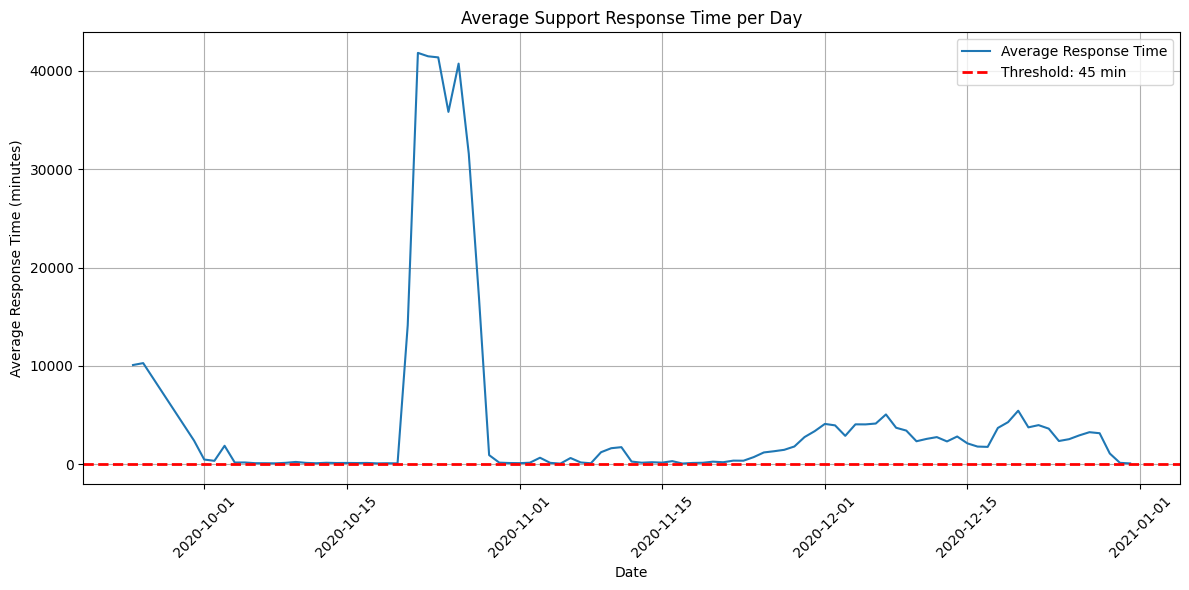

In [6]:
df['response_time'] = (df['start_time'] - df['request_time']).dt.total_seconds() / 60
df['day'] = df['request_time'].dt.date
avg_response_daily = df.groupby('day')['response_time'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_response_daily['day'], avg_response_daily['response_time'], linestyle='-', label='Average Response Time')
plt.axhline(45, color='red', linestyle='--', linewidth=2, label='Threshold: 45 min')
plt.xlabel('Date')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Support Response Time per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


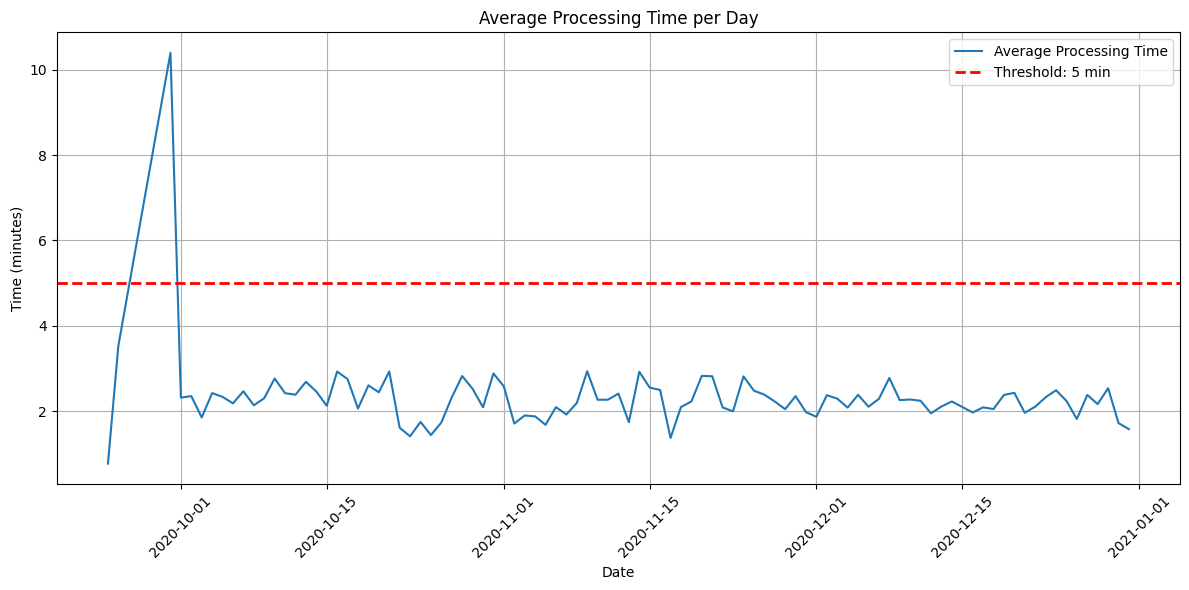

In [8]:
df['processing_time'] = (df['finish_time'] - df['start_time']).dt.total_seconds() / 60
df['day'] = df['request_time'].dt.date
avg_processing_daily = df.groupby('day')['processing_time'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_processing_daily['day'], avg_processing_daily['processing_time'], linestyle='-', label='Average Processing Time')
plt.axhline(5, color='red', linestyle='--', linewidth=2, label='Threshold: 5 min')
plt.xlabel('Date')
plt.ylabel('Time (minutes)')
plt.title('Average Processing Time per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Агенти, на яких варто звернути увагу задля підвищення якості обслуговування

На основі попередніх графіків можна відзначити значну невідповідність між менеджерськими очікуваннями та реальною ситуацією зі середнім часом відповіді підтримкою.

## Аналіз ситуації

- **Середній час відповіді:**  
  Спостерігається суттєве відхилення від встановленого менеджментом часу відповіді (ціль – 15 хв, поріг – 45 хв).

- **Середній час обробки запиту:**  
  Загалом стабільна ситуація, за винятком періоду до початку жовтня, коли спостерігаються певні відхилення.

## Подальші кроки

Для виявлення агентів, на яких варто звернути увагу, необхідно побудувати графік середнього часу відповіді по окремих агентах з розбивкою за командами. Це дозволить:
- Виявити агентів з показниками, що перевищують встановлені критерії.
- Зосередити увагу на оптимізації процесів у тих командах, де спостерігається найвищий час відповіді.

Такий підхід сприятиме підвищенню якості обслуговування та дозволить оперативно реагувати на недоліки.


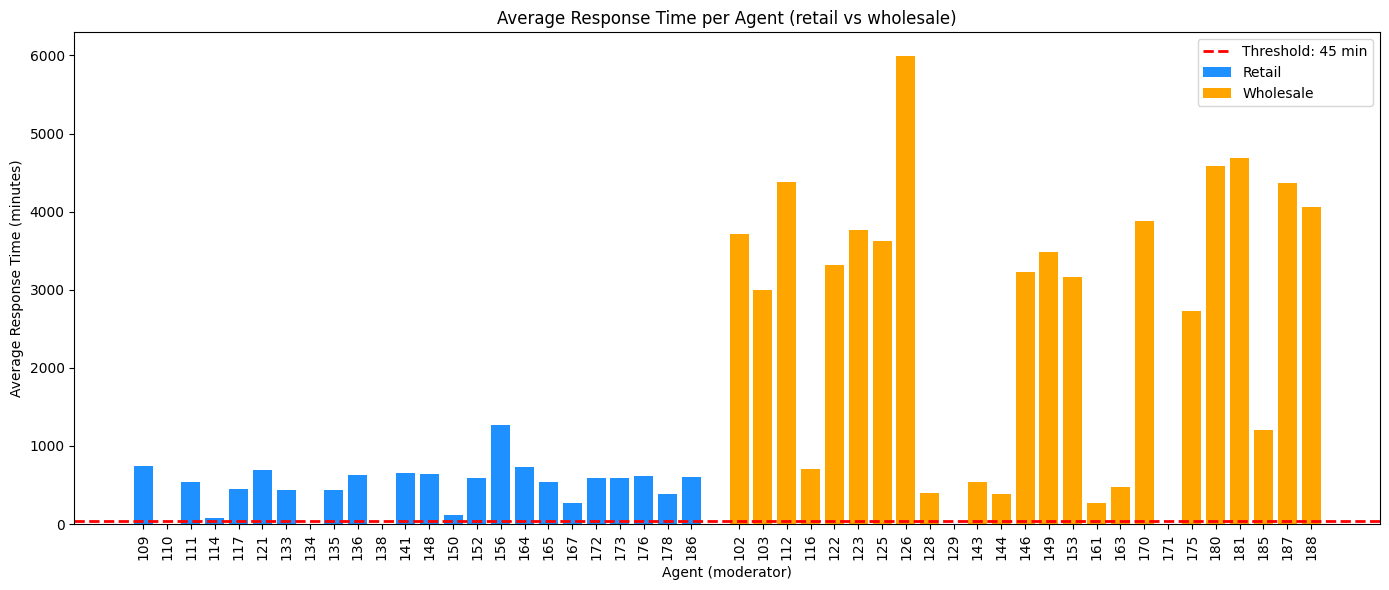

In [10]:
df_retail = df[df['team'] == 'retail'].copy()
df_retail['response_time'] = (df_retail['start_time'] - df_retail['request_time']).dt.total_seconds() / 60
avg_response_retail = df_retail.groupby('moderator')['response_time'].mean().reset_index()

df_wholesale = df[df['team'] == 'wholesale'].copy()
df_wholesale['response_time'] = (df_wholesale['start_time'] - df_wholesale['request_time']).dt.total_seconds() / 60
avg_response_wholesale = df_wholesale.groupby('moderator')['response_time'].mean().reset_index()

positions_retail = np.arange(len(avg_response_retail))
positions_wholesale = np.arange(len(avg_response_wholesale)) + len(avg_response_retail) + 1

color_retail = "dodgerblue"
color_wholesale = "orange"

plt.figure(figsize=(14,6))
bars_retail = plt.bar(positions_retail, avg_response_retail['response_time'], color=color_retail, label='Retail')
bars_wholesale = plt.bar(positions_wholesale, avg_response_wholesale['response_time'], color=color_wholesale, label='Wholesale')

plt.axhline(45, color='red', linestyle='--', linewidth=2, label='Threshold: 45 min')
combined_labels = list(avg_response_retail['moderator']) + list(avg_response_wholesale['moderator'])
combined_positions = np.concatenate([positions_retail, positions_wholesale])

plt.xlabel('Agent (moderator)')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time per Agent (retail vs wholesale)')
plt.xticks(combined_positions, combined_labels, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
count_by_team = df.groupby('team')['moderator'].nunique()
print(count_by_team)

team
retail       24
wholesale    25
Name: moderator, dtype: int64


In [12]:
requests_by_team = df.groupby('team')['id_request'].count()
print(requests_by_team)

team
retail       14025
wholesale    21592
Name: id_request, dtype: int64


# Чи варто збільшити команду підтримки і наскільки?

Спостерігаємо, що в цілому команда **wholesale** відповідає довше. Обидві команди мають майже однакову кількість агентів, але кількість запитів для команди **retail** на 35% менша.

В даному випадку ми не задоволені роботою обох команд, оскільки більшість агентів потребує пришвидшення реагування на запити.

## Пропозиція щодо змін

Промоделюємо для команди **wholesale**, як збільшення штату працівників на **30%** може вплинути на середній час відповіді.


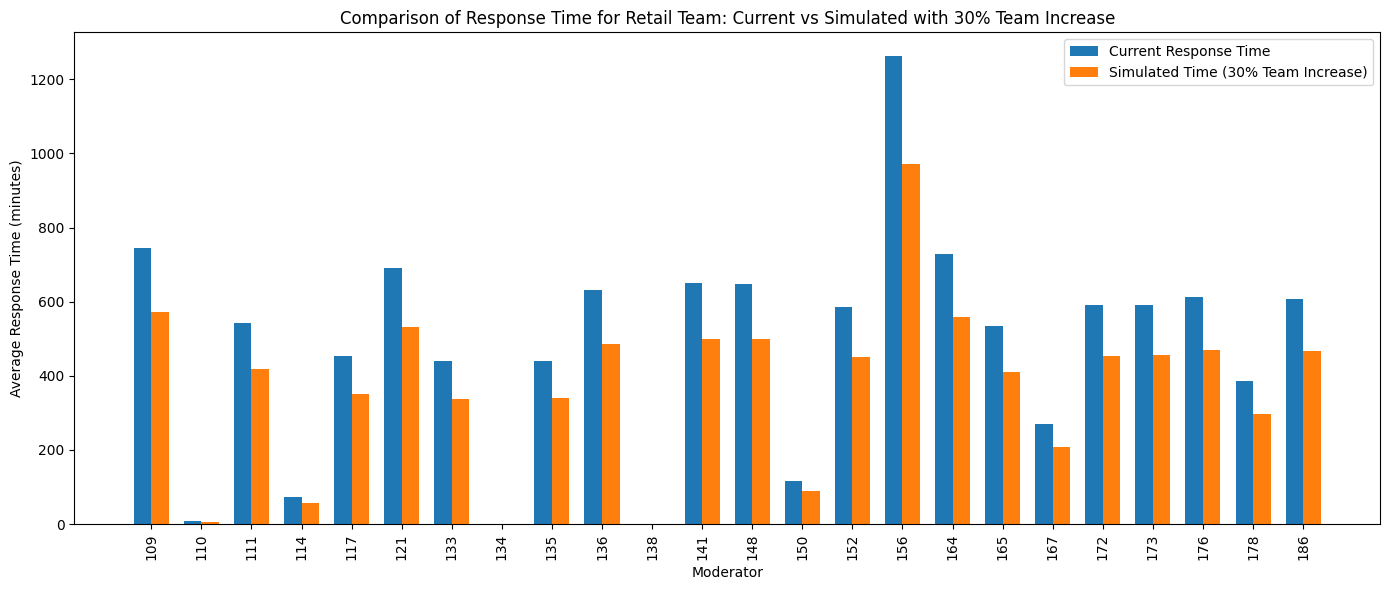

In [13]:
df_retail = df[df['team'] == 'retail'].copy()
df_retail['response_time'] = (df_retail['start_time'] - df_retail['request_time']).dt.total_seconds() / 60
avg_response_retail = df_retail.groupby('moderator')['response_time'].mean().reset_index()

# Simulate a 30% increase in team size (reducing response time by a factor of 1.3)
avg_response_retail['simulated_response_time'] = avg_response_retail['response_time'] / 1.3

x = np.arange(len(avg_response_retail))
width = 0.35

plt.figure(figsize=(14,6))
plt.bar(x - width/2, avg_response_retail['response_time'], width=width, label='Current Response Time')
plt.bar(x + width/2, avg_response_retail['simulated_response_time'], width=width, label='Simulated Time (30% Team Increase)')
plt.xlabel('Moderator')
plt.ylabel('Average Response Time (minutes)')
plt.title('Comparison of Response Time for Retail Team: Current vs Simulated with 30% Team Increase')
plt.xticks(x, avg_response_retail['moderator'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


За спрощеною логікою, якщо прийняти, що час відповіді обернено пропорційний чисельності агентів, то збільшення команди на 30% потенційно може зменшити середній час відповіді приблизно в 1.3 рази.

Проте варто пам’ятати, що це дуже спрощена модель. У реальній ситуації можуть впливати такі фактори:
- **Додаткові витрати на координацію**  
- **Різна складність запитів**  
- **Технічні та організаційні обмеження**

Ці фактори можуть призвести до того, що реальне покращення буде меншим.

В даній ситуації потрібно мати більше контексту, щоб зрозуміти, чому деякі агенти відповідають значно швидше за інших, та яких людей варто наймати для істотного покращення результатів.


# Як варто змінити графік служби підтримки?

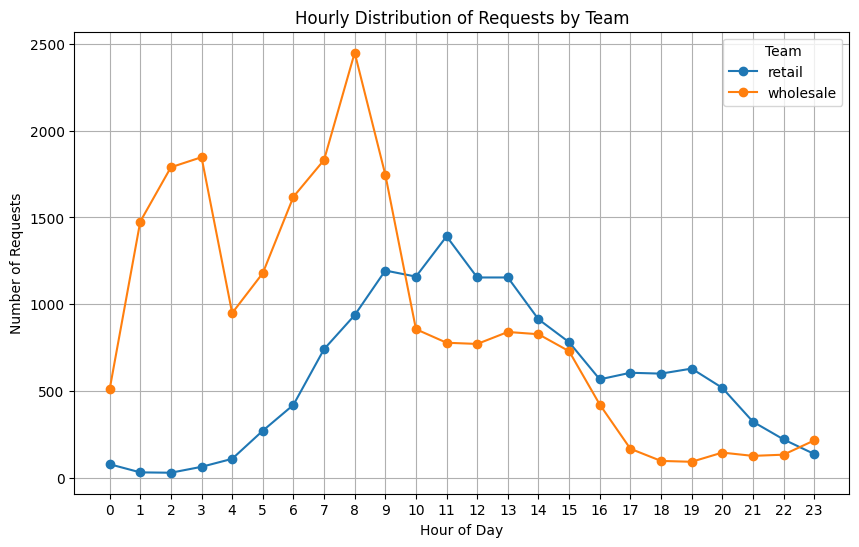

In [14]:
df['hour'] = df['request_time'].dt.hour

# Group by team and hour, then pivot for plotting
hourly_requests = df.groupby(['team', 'hour']).size().reset_index(name='num_requests')
pivot_table = hourly_requests.pivot(index='hour', columns='team', values='num_requests').fillna(0)

plt.figure(figsize=(10,6))
for team in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[team], marker='o', linestyle='-', label=team)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('Hourly Distribution of Requests by Team')
plt.xticks(range(0, 24))
plt.legend(title='Team')
plt.grid(True)
plt.show()

# Чи є вигода від об'єднання команд?

Об'єднання команд може забезпечити значні переваги в оптимізації процесів служби підтримки, проте остаточне рішення повинно базуватись на комплексному аналізі. 

## Основні аргументи

- **Покращення розподілу навантаження:**
  - Об'єднання дозволяє рівномірно розподілити запити між агентами, що може зменшити перевантаження окремих підрозділів.
  - Аналіз показників (середній час відповіді, час обробки, дисперсія) допомагає виявити нерівномірний розподіл роботи.

- **Оптимізація використання ресурсів:**
  - Спільне управління дозволяє краще планувати графік роботи, а також адаптувати ресурси до піків навантаження.
  - Можливе зниження операційних витрат за рахунок зменшення дублювання процесів та адміністративних витрат.

- **Покращення якості обслуговування:**
  - Є потенціал для підвищення швидкості обробки запитів та підвищення задоволеності клієнтів, якщо об'єднання дозволить оперативно реагувати на пікові навантаження.
  - Узгодження стандартів роботи і підвищення ефективності комунікації між співробітниками.

## Ключові показники для прийняття рішення

- **Метрики роботи:** Середній час відповіді, час обробки запитів, розподіл навантаження на агентів.
- **Оцінка ефективності:** Аналіз відгуків клієнтів і рівня задоволеності сервісом.
- **Фінансовий аналіз:** Затрати на утримання роздільних команд проти потенційних економій при їхньому об'єднанні.

## Висновок

Об'єднання команд може бути вигідним, якщо:
- Показники ефективності обох команд (час відповіді, навантаження) є подібними.
- Існує нерівномірний розподіл роботи, де одна команда перевантажена, а інша працює з недозавантаженням.
- Організаційні процеси дозволяють інтегрувати команди з мінімальними витратами на адаптацію та координацію.

Остаточне рішення повинно базуватися на аналізі кількісних та якісних показників, що підтверджують потенційну економію витрат і підвищення якості обслуговування клієнтів.
